In [1]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
scale = "60"
fps = 10
seq_length = 10
full_length = 200

In [3]:
segments_upward = pd.read_csv('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Data/Output/pigeons/' + 'segup_' + scale + '_seq' + str(int(seq_length/fps)) + '.csv')
segments_downward = pd.read_csv('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Data/Output/pigeons/' + 'segdown_' + scale + '_seq' + str(int(seq_length/fps)) + '.csv')

bootu = pd.read_csv('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Data/Output/pigeons/' + 'bootup_' + scale + '_seq' + str(int(seq_length/fps)) + '.csv')
bootd = pd.read_csv('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Data/Output/pigeons/' + 'bootdown_' + scale + '_seq' + str(int(seq_length/fps)) + '.csv')

In [4]:
segu = segments_upward.groupby(['#t(centisec)'])['ang_pos', 'dist', 'speed_diff', 'acc_diff', 'cc'].mean().reset_index()
segd = segments_downward.groupby(['#t(centisec)'])['ang_pos', 'dist', 'speed_diff', 'acc_diff', 'cc'].mean().reset_index()

segu.columns = ['#t(centisec)', 'apu', 'distu', 'sdu', 'adu', 'ccu']
segd.columns = ['#t(centisec)', 'apd', 'distd', 'sdd', 'add', 'ccd']

segments = pd.merge(segu, segd)

In [5]:
bootu_h = bootu.groupby(['#t(centisec)'])['apu', 'distu', 'sdu', 'adu', 'ccu'].quantile(0.975).reset_index()
bootu_l = bootu.groupby(['#t(centisec)'])['apu', 'distu', 'sdu', 'adu', 'ccu'].quantile(0.025).reset_index()
bootd_h = bootd.groupby(['#t(centisec)'])['apd', 'distd', 'sdd', 'add', 'ccd'].quantile(0.975).reset_index()
bootd_l = bootd.groupby(['#t(centisec)'])['apd', 'distd', 'sdd', 'add', 'ccd'].quantile(0.025).reset_index()

bootu_h.columns = ['#t(centisec)', 'apu_h', 'distu_h', 'sdu_h', 'adu_h', 'ccu_h']
bootu_l.columns = ['#t(centisec)', 'apu_l', 'distu_l', 'sdu_l', 'adu_l', 'ccu_l']
bootd_h.columns = ['#t(centisec)', 'apd_h', 'distd_h', 'sdd_h', 'add_h', 'ccd_h']
bootd_l.columns = ['#t(centisec)', 'apd_l', 'distd_l', 'sdd_l', 'add_l', 'ccd_l']

bootu = pd.merge(bootu_h, bootu_l)
bootd = pd.merge(bootd_h, bootd_l)
bootstraps = pd.merge(bootu, bootd)

In [6]:
len(np.unique(segments_upward['event'])), len(np.unique(segments_downward['event']))

(325, 342)

#### Effect of kinematics relative to neighbour

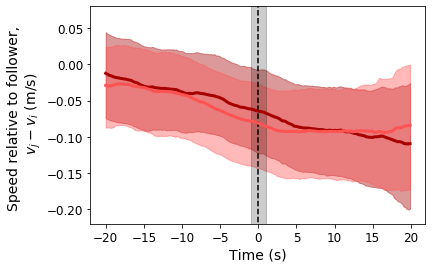

In [12]:
plt.plot(segments['#t(centisec)']/fps, segments['sdu'], c='#a70000', linewidth=3)
plt.plot(segments['#t(centisec)']/fps, segments['sdd'], c='#ff5252', linewidth=3)

plt.fill_between(bootstraps['#t(centisec)']/fps, bootstraps['sdu_l'], bootstraps['sdu_h'], color='#a70000', alpha=0.4)
plt.fill_between(bootstraps['#t(centisec)']/fps, bootstraps['sdd_l'], bootstraps['sdd_h'], color='#ff5252', alpha=0.4)

plt.axvspan(-seq_length/fps, seq_length/fps, alpha=0.2, color='black')
plt.vlines(0,  -1.38, 0.1, color='black', linestyles='dashed')
if scale == '07':
    plt.ylim(-0.5, 0.05)
elif scale == '15':
    plt.ylim(-0.47,0.08)
elif scale == '30':
    plt.ylim(-0.45,0.08)
else:
    plt.ylim(-0.22,0.08)
    
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Speed relative to follower, \n $v_j - v_i$ (m/s)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Figures/pigeons/speed_diff_' + scale + '_seq' + str(int(seq_length/fps)) + '.png', format='png', dpi=600, bbox_inches="tight")

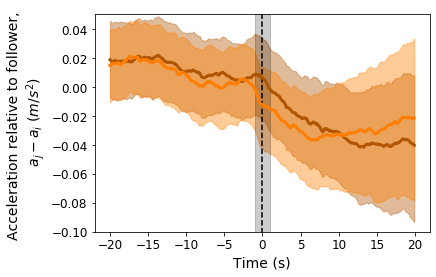

In [13]:
plt.plot(segments['#t(centisec)']/fps, segments['adu'], c='#b05600', linewidth=3)
plt.plot(segments['#t(centisec)']/fps, segments['add'], c='#ff7d00', linewidth=3)

plt.fill_between(bootstraps['#t(centisec)']/fps, bootstraps['adu_l'], bootstraps['adu_h'], color='#b05600', alpha=0.4)
plt.fill_between(bootstraps['#t(centisec)']/fps, bootstraps['add_l'], bootstraps['add_h'], color='#ff7d00', alpha=0.4)

plt.axvspan(-seq_length/fps, seq_length/fps, alpha=0.2, color='black')
plt.vlines(0,  -0.6, 0.1, color='black', linestyles='dashed')
if scale == '07':
    plt.ylim(-0.25, 0.07)
elif scale == '15':
    plt.ylim(-0.22,0.05)
elif scale == '30':
    plt.ylim(-0.17,0.05)
else:
    plt.ylim(-0.1,0.05)
    
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Acceleration relative to follower, \n $a_j - a_i$ ($m/s^2$)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Figures/pigeons/acc_diff_' + scale + '_seq' + str(int(seq_length/fps)) + '.png', format='png', dpi=600, bbox_inches="tight")

#### Effect of distance and angular position on leadership

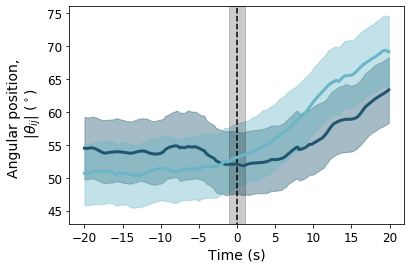

In [15]:
plt.plot(segments['#t(centisec)']/fps, segments['apu']*180/np.pi, c='#20576e', linewidth=3)
plt.plot(segments['#t(centisec)']/fps, segments['apd']*180/np.pi, c='#6ab6c6', linewidth=3)

plt.fill_between(bootstraps['#t(centisec)']/fps, bootstraps['apu_l']*180/np.pi, bootstraps['apu_h']*180/np.pi, color='#20576e', alpha=0.4)
plt.fill_between(bootstraps['#t(centisec)']/fps, bootstraps['apd_l']*180/np.pi, bootstraps['apd_h']*180/np.pi, color='#6ab6c6', alpha=0.4)

plt.axvspan(-seq_length/fps, seq_length/fps, alpha=0.2, color='black')
plt.vlines(0, 40, 103, color='black', linestyles='dashed')
if scale == '07':
    plt.ylim(67, 92)
elif scale == '15':
    plt.ylim(55,88)
elif scale == '30':
    plt.ylim(48,78)
else:
    plt.ylim(43,76)
    
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Angular position, \n $|\\theta_{ij}|$ ($^\circ$)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Figures/pigeons/ang_pos_' + scale + '_seq' + str(int(seq_length/fps)) + '.png', format='png', dpi=600, bbox_inches="tight")

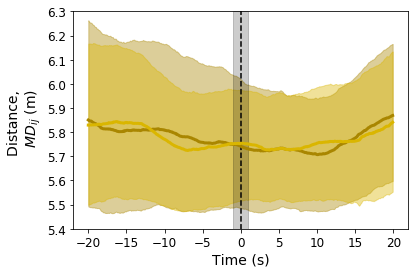

In [18]:
plt.plot(segments['#t(centisec)']/fps, segments['distu'], c='#a98600', linewidth=3)
plt.plot(segments['#t(centisec)']/fps, segments['distd'], c='#dab600', linewidth=3)

plt.fill_between(bootstraps['#t(centisec)']/fps, bootstraps['distu_l'], bootstraps['distu_h'], color='#a98600', alpha=0.4)
plt.fill_between(bootstraps['#t(centisec)']/fps, bootstraps['distd_l'], bootstraps['distd_h'], color='#dab600', alpha=0.4)

plt.axvspan(-seq_length/fps, seq_length/fps, alpha=0.2, color='black')
plt.vlines(0, 5, 10, color='black', linestyles='dashed')
if scale == '07':
    plt.ylim(7.4, 9.4)
elif scale == '15':
    plt.ylim(6.4,9.1)
elif scale == '30':
    plt.ylim(6.2,7.7)
else:
    plt.ylim(5.4,6.3)

plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Distance, \n $MD_{ij}$ (m)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('/home/user/Documents/Vivek/cuda/DirectionalCorrelation/Figures/pigeons/dist_' + scale + '_seq' + str(int(seq_length/fps)) + '.png', format='png', dpi=600, bbox_inches="tight")